In [1]:
!pip install pytorch-lightning
!pip install torchvision
!pip install matplotlib
!pip install datasets
!pip install wandb
!pip install --upgrade ipywidgets

In [2]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import torchmetrics
from torchvision.datasets import ImageFolder
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from pytorch_lightning.loggers import TensorBoardLogger
import matplotlib.pyplot as plt
from torch.utils.data import random_split
import torch
import numpy as np
from datasets import load_dataset
from torchvision.transforms import v2
from torchvision.models import efficientnet_b7, EfficientNet_B7_Weights
from torchvision.models import efficientnet_v2_s, EfficientNet_V2_S_Weights
from torchvision.models import EfficientNet_B0_Weights
from torchvision.models import ResNet50_Weights
from torchvision.models import MobileNet_V3_Large_Weights
from torchvision.models import (
    SqueezeNet1_0_Weights,
    EfficientNet_V2_S_Weights,
    GoogLeNet_Weights,
    Inception_V3_Weights
)
from pytorch_lightning.loggers import WandbLogger

In [3]:
from pytorch_lightning.loggers import WandbLogger
from kaggle_secrets import UserSecretsClient
import wandb
import os


secret_label = "wand_token"
secret_value = UserSecretsClient().get_secret(secret_label)

os.environ["WANDB_API_KEY"] = secret_value


wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: s26048 (s26048-polish-japanese-academy-of-information-technology-). Use `wandb login --relogin` to force relogin


True

In [4]:
class AnimationTypesDatamodule(pl.LightningDataModule):
  def __init__(self, batch_size = 32):
    super().__init__()
    self.batch_size = batch_size
  def setup(self, stage = None):
    transform = v2.Compose([
                        # v2.To
                        v2.ToImage(),
                        v2.Resize(256),
                        v2.CenterCrop(224),
                        v2.RandomHorizontalFlip(p=0.5),
                        v2.RandomRotation(30),
                        v2.ToDtype(torch.float32, scale=True), # v2.ToTensor()
                        v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                        ])


    transform_vt = v2.Compose([
                        v2.ToImage(),
                        v2.Resize(256),
                        v2.CenterCrop(224),
                        v2.ToDtype(torch.float32, scale=True),
                        v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                        ])


    def transforms(examples):
        examples["pixel_values"] = [transform(img.convert("RGB")) for img in examples["image"]]
        del examples["image"]
        return examples

    def transforms_vt(examples):
        examples["pixel_values"] = [transform_vt(img.convert("RGB")) for img in examples["image"]]
        del examples["image"]
        return examples

    # dataset = load_dataset("krowiemlekommm/animation_dataset")
    dataset = load_dataset("krowiemlekommm/animation_dataset_04_01_2025")

    # train_dataset = dataset["train"].train_test_split(test_size=0.2, seed=42, stratify_by_column="label")

    # self.train_dataset = train_dataset["train"].with_transform(transforms)
    self.train_dataset = dataset["train"].with_transform(transforms)
    self.test_dataset = dataset["test"].with_transform(transforms_vt)
    self.val_dataset = dataset["validation"].with_transform(transforms_vt)

  def train_dataloader(self):
    return  DataLoader(self.train_dataset, num_workers = 4, batch_size = self.batch_size, shuffle = True)
  def test_dataloader(self):
    return  DataLoader(self.test_dataset, num_workers = 4, batch_size = self.batch_size, shuffle = False)
  def val_dataloader(self):
    return  DataLoader(self.val_dataset, num_workers = 4, batch_size = self.batch_size, shuffle = False)

In [5]:
dm = AnimationTypesDatamodule()

In [6]:
dm.setup()

README.md:   0%|          | 0.00/683 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/231M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/58.5M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/46.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/4966 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1027 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1100 [00:00<?, ? examples/s]

In [7]:
dm.train_dataset[0]

{'label': 0,
 'pixel_values': Image([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],
 
        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],
 
        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8

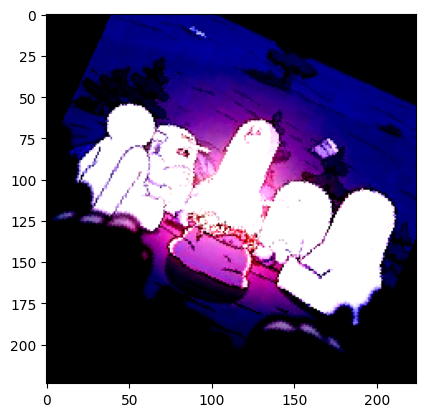

In [8]:
img = dm.train_dataset[0]["pixel_values"]
img = img.permute(1, 2, 0)
plt.imshow(img)

In [10]:
import torch
import torch.nn.functional as F
import torch.optim as optim
import pytorch_lightning as pl
import torchmetrics
import torch.nn as nn

class MovieFrame(pl.LightningModule):
    def __init__(self, model_name, layer1_size, dropout_rate, lr, num_classes=4):
        super().__init__()

        if model_name == "efficientnet_b7":
            self.model = models.efficientnet_b7(weights=EfficientNet_B7_Weights.IMAGENET1K_V1)
            self.backbone = self.model.features
            self.pooling = self.model.avgpool
            self.infeatures = self.model.classifier[1].in_features
        elif model_name == "efficientnet_b0":
            self.model = models.efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)
            self.backbone = self.model.features
            self.pooling = self.model.avgpool
            self.infeatures = self.model.classifier[1].in_features
        elif model_name == "resnet_50":
            self.model = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
            self.backbone = torch.nn.Sequential(*list(self.model.children())[:-2])
            self.pooling = self.model.avgpool
            self.infeatures = self.model.fc.in_features
        elif model_name == "mobile_net_v3_l":
            self.model = models.mobilenet_v3_large(weights=MobileNet_V3_Large_Weights.IMAGENET1K_V2)
            self.backbone = self.model.features
            self.pooling = self.model.avgpool
            self.infeatures = self.model.classifier[0].in_features
        elif model_name == "efficientnet_v2_s":
            self.model = models.efficientnet_v2_s(weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1)
            self.backbone = self.model.features
            self.pooling = self.model.avgpool
            self.infeatures = self.model.classifier[1].in_features
        elif model_name == "googlenet":
            self.model = models.googlenet(weights=GoogLeNet_Weights.IMAGENET1K_V1)
            self.backbone = torch.nn.Sequential(*list(self.model.children())[:-2])
            self.pooling = self.model.avgpool
            self.infeatures = self.model.fc.in_features
        else:
            raise ValueError(f"Unsupported model_name: {model_name}")


        self.dropout = nn.Dropout(p=dropout_rate, inplace=True)
        self.fc1 = nn.Linear(self.infeatures, layer1_size)
        self.fc2 = nn.Linear(layer1_size, num_classes)
        self.lr = lr
        self.loss_function = nn.CrossEntropyLoss()

        self.train_acc = torchmetrics.Accuracy(task="multiclass", num_classes=num_classes)
        self.val_acc = torchmetrics.Accuracy(task="multiclass", num_classes=num_classes)
        self.test_acc = torchmetrics.Accuracy(task="multiclass", num_classes=num_classes)

        self.train_macro_f1 = torchmetrics.F1Score(num_classes=num_classes, task="multiclass", average='macro')
        self.val_macro_f1 = torchmetrics.F1Score(num_classes=num_classes, task="multiclass", average='macro')
        self.test_f1 = torchmetrics.F1Score(num_classes=num_classes, task="multiclass", average='macro')

        self.train_macro_recall = torchmetrics.Recall(num_classes=num_classes, task="multiclass", average='macro')
        self.val_macro_recall = torchmetrics.Recall(num_classes=num_classes, task="multiclass", average='macro')

        self.train_macro_precision = torchmetrics.Precision(num_classes=num_classes, task="multiclass", average='macro')
        self.val_macro_precision = torchmetrics.Precision(num_classes=num_classes, task="multiclass", average='macro')

        for param in self.backbone.parameters():
            param.requires_grad = False

    def forward(self, x):
        self.backbone.eval()
        with torch.no_grad():
            x = self.backbone(x)
            x = self.pooling(x).flatten(1)
        x = self.dropout(x)
        x = F.relu(x)
        x = self.fc1(x)
        x = self.dropout(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=self.lr)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        inputs, labels = train_batch["pixel_values"], train_batch["label"]
        outputs = self.forward(inputs.float())
        loss = self.loss_function(outputs, labels)
        self.log('train_loss', loss, on_step=True, on_epoch=True)

        outputs = F.softmax(outputs, dim=1)
        self.train_acc(outputs, labels)
        self.log('train_acc', self.train_acc, on_epoch=True, on_step=False)
        self.train_macro_f1(outputs, labels)
        self.log('train_macro_f1', self.train_macro_f1, on_epoch=True, on_step=False)
        self.train_macro_recall(outputs, labels)
        self.log('train_macro_recall', self.train_macro_recall, on_epoch=True, on_step=False)
        self.train_macro_precision(outputs, labels)
        self.log('train_macro_precision', self.train_macro_precision, on_epoch=True, on_step=False)

        return loss

    def validation_step(self, val_batch, batch_idx):
        inputs, labels = val_batch["pixel_values"], val_batch["label"]
        outputs = self.forward(inputs.float())
        loss = self.loss_function(outputs, labels)
        self.log('val_loss', loss, on_step=True, on_epoch=True, sync_dist=True)

        outputs = F.softmax(outputs, dim=1)
        self.val_acc(outputs, labels)
        self.log('val_acc', self.val_acc, on_epoch=True, on_step=False)
        self.val_macro_f1(outputs, labels)
        self.log('val_macro_f1', self.val_macro_f1, on_epoch=True, on_step=False)
        self.val_macro_recall(outputs, labels)
        self.log('val_macro_recall', self.val_macro_recall, on_epoch=True, on_step=False)
        self.val_macro_precision(outputs, labels)
        self.log('val_macro_precision', self.val_macro_precision, on_epoch=True, on_step=False)

        return loss



    def test_step(self, batch, batch_idx):
        # this is the test loop
        inputs, labels = batch["pixel_values"], batch["label"]
        outputs = self.forward(inputs.float())
        
        loss = self.loss_function(outputs, labels)
        self.log("test_loss", loss)

        self.test_acc(outputs, labels)
        self.log('test_acc', self.test_acc)
        
        self.test_f1(outputs, labels)
        self.log('test_f1', self.test_f1)



In [11]:
sweep_configuration = {
    'method': 'random',
    'name': 'find_model',
    'metric': {'goal': 'maximize', 'name': 'val_macro_f1'},
    'parameters': {
        'model_name': {'values': ['resnet_50', 'efficientnet_b0', 'mobile_net_v3_l', 'efficientnet_v2_s', 'googlenet', 'inception_v3']},
        'batch_size': {'values': [64]},
        'n_epochs': {'values': [10]},
        'learning_rate': {'values': [0.0001]},
        'layer1_size': {'values': [256]},
        'dropout_rate': {'values': [0.5]},
    }
}

In [12]:
def sweep_train(config=None):
    with wandb.init(config=config) as run:
        config = wandb.config
        wandb_logger = WandbLogger(project="find_model", log_model=True, name=f"sweep_run_{wandb.run.id}")
        name_str = f"{config.model_name}_{config.layer1_size}_{str(config.learning_rate)[:8]}"
        run.name = name_str
        dm = AnimationTypesDatamodule(batch_size=config.batch_size)
        dm.setup()

        model = MovieFrame(
            model_name=config.model_name,
            num_classes=4,
            layer1_size=config.layer1_size,
            dropout_rate=config.dropout_rate,
            lr=config.learning_rate,
        )

        trainer = pl.Trainer(accelerator="gpu", logger=wandb_logger, max_epochs=config.n_epochs)
        trainer.fit(model, dm)
        trainer.test(model,dm)
        wandb.finish()


In [13]:
sweep_id = wandb.sweep(sweep=sweep_configuration, project='find_model')

Create sweep with ID: bkvmp1wq
Sweep URL: https://wandb.ai/s26048-polish-japanese-academy-of-information-technology-/find_model/sweeps/bkvmp1wq


In [ ]:
wandb.agent(sweep_id, function=sweep_train, count=30)

wandb: Agent Starting Run: bab4hpaa with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.5
wandb: 	layer1_size: 256
wandb: 	learning_rate: 0.0001
wandb: 	model_name: resnet_50
wandb: 	n_epochs: 10


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 203MB/s]
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loggers/wandb.py:396: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7754545211791992     │
│          test_f1          │    0.7760699987411499     │
│         test_loss         │    0.5929418802261353     │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇█
test_acc,▁
test_f1,▁
test_loss,▁
train_acc,▁▅▆▇▇▇████
train_loss_epoch,█▄▃▂▂▂▁▁▁▁
train_loss_step,█▆▅▅▄▅▃▂▄▂▃▄▃▄▁
train_macro_f1,▁▅▆▇▇▇████
train_macro_precision,▁▅▆▇▇▇████
train_macro_recall,▁▅▆▇▇▇████
trainer/global_step,▁▁▁▁▁▁▂▁▁▁▁▂▃▁▁▁▄▄▂▂▄▂▅▅▂▂▂▂▂▂▂▇▂▂▂▂▂▂▂█


wandb: Agent Starting Run: xf3g42eg with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.5
wandb: 	layer1_size: 256
wandb: 	learning_rate: 0.0001
wandb: 	model_name: efficientnet_v2_s
wandb: 	n_epochs: 10


Downloading: "https://download.pytorch.org/models/efficientnet_v2_s-dd5fe13b.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_s-dd5fe13b.pth
100%|██████████| 82.7M/82.7M [00:00<00:00, 194MB/s]
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loggers/wandb.py:396: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7454545497894287     │
│          test_f1          │    0.7471898794174194     │
│         test_loss         │    0.6860523819923401     │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇█
test_acc,▁
test_f1,▁
test_loss,▁
train_acc,▁▅▇▇▇█████
train_loss_epoch,█▅▃▂▂▁▁▁▁▁
train_loss_step,█▆▅▄▃▄▄▄▃▂▃▃▂▃▁
train_macro_f1,▁▅▇▇▇█████
train_macro_precision,▁▅▇▇▇█████
train_macro_recall,▁▅▇▇▇█████
trainer/global_step,▁▁▁▁▂▁▁▁▂▃▁▁▁▁▃▁▁▄▂▂▂▂▂▂▂▅▅▂▂▂▂▂▂▂▂▇▂▂▂█


wandb: Agent Starting Run: 22rqby08 with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.5
wandb: 	layer1_size: 256
wandb: 	learning_rate: 0.0001
wandb: 	model_name: efficientnet_b0
wandb: 	n_epochs: 10


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 156MB/s]


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7681818008422852     │
│          test_f1          │    0.7683830261230469     │
│         test_loss         │    0.5873449444770813     │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇█
test_acc,▁
test_f1,▁
test_loss,▁
train_acc,▁▅▇▇█▇████
train_loss_epoch,█▄▃▂▂▂▁▁▁▁
train_loss_step,█▆▄▃▃▂▄▄▁▂▂▂▃▁▂
train_macro_f1,▁▅▆▇▇▇████
train_macro_precision,▁▅▆▇▇▇████
train_macro_recall,▁▅▇▇▇▇████
trainer/global_step,▁▁▁▁▁▁▃▁▁▁▁▁▃▂▂▂▄▂▂▂▂▂▂▂▂▂▂▂▆▂▂▂▂▂▂██▃▃▃


wandb: Agent Starting Run: ofl51uo7 with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.5
wandb: 	layer1_size: 256
wandb: 	learning_rate: 0.0001
wandb: 	model_name: efficientnet_v2_s
wandb: 	n_epochs: 10


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7409090995788574     │
│          test_f1          │     0.742892324924469     │
│         test_loss         │    0.6854867935180664     │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇█
test_acc,▁
test_f1,▁
test_loss,▁
train_acc,▁▅▆▇▇█████
train_loss_epoch,█▅▃▂▂▂▁▁▁▁
train_loss_step,█▆▅▄▄▂▃▄▃▃▂▃▃▂▁
train_macro_f1,▁▅▆▇▇█████
train_macro_precision,▁▅▆▇▇█████
train_macro_recall,▁▅▆▇▇█████
trainer/global_step,▁▁▁▁▁▁▁▁▁▁▁▁▁▃▁▂▂▂▂▂▅▂▂▂▆▂▂▂▂▂▂▂▂▂▂▂▃█▃▃


wandb: Agent Starting Run: bg6rak26 with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.5
wandb: 	layer1_size: 256
wandb: 	learning_rate: 0.0001
wandb: 	model_name: mobile_net_v3_l
wandb: 	n_epochs: 10


Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-5c1a4163.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-5c1a4163.pth
100%|██████████| 21.1M/21.1M [00:00<00:00, 151MB/s]


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7672727108001709     │
│          test_f1          │    0.7672239542007446     │
│         test_loss         │    0.6139359474182129     │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇█
test_acc,▁
test_f1,▁
test_loss,▁
train_acc,▁▆▇▇▇▇████
train_loss_epoch,█▅▃▂▂▂▁▁▁▁
train_loss_step,█▅▅▅▃▃▃▃▄▂▃▂▃▁▃
train_macro_f1,▁▅▆▇▇▇████
train_macro_precision,▁▅▆▇▇▇████
train_macro_recall,▁▅▇▇▇▇████
trainer/global_step,▁▁▁▂▂▁▁▁▁▁▂▂▂▂▂▄▂▂▂▂▂▂▂▂▂▂▂▂▂▂██▂▂▃▃▃▃▃▃


wandb: Agent Starting Run: xw2o9y1g with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.5
wandb: 	layer1_size: 256
wandb: 	learning_rate: 0.0001
wandb: 	model_name: efficientnet_v2_s
wandb: 	n_epochs: 10


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │     0.746363639831543     │
│          test_f1          │    0.7472763061523438     │
│         test_loss         │    0.6844580173492432     │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇█
test_acc,▁
test_f1,▁
test_loss,▁
train_acc,▁▆▆▇▇█▇███
train_loss_epoch,█▅▃▂▂▂▁▁▁▁
train_loss_step,█▆▅▄▄▃▂▃▂▁▁▂▄▄▂
train_macro_f1,▁▅▆▇▇█▇███
train_macro_precision,▁▅▆▇▇▇▇███
train_macro_recall,▁▆▆▇▇█▇███
trainer/global_step,▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▅▅▂▅▂▂▂▂▂▂▇▂▂▂▂▂▂▂█


wandb: Agent Starting Run: l8preh9l with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.5
wandb: 	layer1_size: 256
wandb: 	learning_rate: 0.0001
wandb: 	model_name: resnet_50
wandb: 	n_epochs: 10


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7772727012634277     │
│          test_f1          │     0.778291642665863     │
│         test_loss         │    0.5885872840881348     │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇█
test_acc,▁
test_f1,▁
test_loss,▁
train_acc,▁▅▆▇▇█████
train_loss_epoch,█▄▃▂▂▂▁▁▁▁
train_loss_step,█▅▆▄▅▃▂▄▂▄▂▄▃▂▁
train_macro_f1,▁▅▆▇▇▇████
train_macro_precision,▁▅▆▇▇▇████
train_macro_recall,▁▅▆▇▇█████
trainer/global_step,▁▁▁▁▁▁▁▂▁▁▁▁▁▂▂▂▂▂▄▅▂▂▂▅▅▂▂▂▂▂▂▂▂▂▂▂█▂▂█


wandb: Agent Starting Run: 1x694su8 with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.5
wandb: 	layer1_size: 256
wandb: 	learning_rate: 0.0001
wandb: 	model_name: mobile_net_v3_l
wandb: 	n_epochs: 10


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7572727203369141     │
│          test_f1          │    0.7582927346229553     │
│         test_loss         │    0.6132646799087524     │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇█
test_acc,▁
test_f1,▁
test_loss,▁
train_acc,▁▆▇▇▇▇████
train_loss_epoch,█▅▃▂▂▂▂▁▁▁
train_loss_step,█▆▆▄▄▅▃▄▃▃▃▃▃▄▁
train_macro_f1,▁▅▆▇▇▇████
train_macro_precision,▁▅▆▇▇▇████
train_macro_recall,▁▆▇▇▇▇████
trainer/global_step,▁▁▂▁▁▂▁▁▁▁▁▁▂▄▂▂▂▅▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂██▂▂▂▃▃


wandb: Agent Starting Run: ywufqghy with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.5
wandb: 	layer1_size: 256
wandb: 	learning_rate: 0.0001
wandb: 	model_name: googlenet
wandb: 	n_epochs: 10


Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:00<00:00, 132MB/s] 


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.6981818079948425     │
│          test_f1          │    0.6994354724884033     │
│         test_loss         │    0.7294490337371826     │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇█
test_acc,▁
test_f1,▁
test_loss,▁
train_acc,▁▅▆▇▇█████
train_loss_epoch,█▅▄▃▂▂▁▁▁▁
train_loss_step,█▅▅▄▂▃▃▂▃▁▂▂▂▂▁
train_macro_f1,▁▅▆▇▇▇████
train_macro_precision,▁▅▆▇▇▇████
train_macro_recall,▁▅▆▇▇█████
trainer/global_step,▁▁▁▁▁▄▁▁▁▂▂▂▆▂▂▂▂▆▂▂▂██▂▃▃▃▃▃▃▃▃▃▃▃▃▃▃▄▄


wandb: Agent Starting Run: ajjphkqm with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.5
wandb: 	layer1_size: 256
wandb: 	learning_rate: 0.0001
wandb: 	model_name: inception_v3
wandb: 	n_epochs: 10


Traceback (most recent call last):
  File "<ipython-input-12-9801c4f92014>", line 10, in sweep_train
    model = MovieFrame(
  File "<ipython-input-10-ba04d396b197>", line 48, in __init__
    self.model = models.inception_v3(weights=Inception_V3_Weights.IMAGENET1K_V1, aux_logits=False)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py", line 142, in wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py", line 228, in inner_wrapper
    return builder(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/inception.py", line 466, in inception_v3
    _ovewrite_named_param(kwargs, "aux_logits", True)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py", line 238, in _ovewrite_named_param
    raise ValueError(f"The parameter '{param}' expected value {new_value} but got {kwargs[param]} instead.")
ValueError: The parameter 'aux_logits' expected value T

Run ajjphkqm errored:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/wandb/agents/pyagent.py", line 306, in _run_job
    self._function()
  File "<ipython-input-12-9801c4f92014>", line 10, in sweep_train
    model = MovieFrame(
  File "<ipython-input-10-ba04d396b197>", line 48, in __init__
    self.model = models.inception_v3(weights=Inception_V3_Weights.IMAGENET1K_V1, aux_logits=False)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py", line 142, in wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py", line 228, in inner_wrapper
    return builder(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/inception.py", line 466, in inception_v3
    _ovewrite_named_param(kwargs, "aux_logits", True)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py", line 238, in _ovewrite_named_param
    raise ValueError(f"Th

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7599999904632568     │
│          test_f1          │    0.7612627744674683     │
│         test_loss         │    0.6175697445869446     │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇█
test_acc,▁
test_f1,▁
test_loss,▁
train_acc,▁▆▇▇██████
train_loss_epoch,█▅▃▂▂▂▁▁▁▁
train_loss_step,█▆▄▂▄▃▃▃▂▂▁▂▁▂▂
train_macro_f1,▁▅▇▇▇█████
train_macro_precision,▁▅▆▇▇▇████
train_macro_recall,▁▅▇▇██████
trainer/global_step,▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▃▃▂▂▂▂▂▂▂▂▂▅▆▆▂▂▇▂▂▇▂▂▂▂█


wandb: Agent Starting Run: 1lsvp6e1 with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.5
wandb: 	layer1_size: 256
wandb: 	learning_rate: 0.0001
wandb: 	model_name: mobile_net_v3_l
wandb: 	n_epochs: 10


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7672727108001709     │
│          test_f1          │    0.7664197683334351     │
│         test_loss         │    0.6095366477966309     │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇█
test_acc,▁
test_f1,▁
test_loss,▁
train_acc,▁▅▆▇██████
train_loss_epoch,█▅▃▂▂▁▁▁▁▁
train_loss_step,█▆▅▄▄▃▃▃▂▃▂▂▄▃▁
train_macro_f1,▁▅▆▇██████
train_macro_precision,▁▅▆▇▇█████
train_macro_recall,▁▅▆▇██████
trainer/global_step,▁▁▁▁▁▁▂▁▁▁▁▁▁▂▁▁▁▁▁▁▂▂▅▂▂▂▅▂▂▂▂▂▆▇▂▂▂▂█▂


wandb: Agent Starting Run: h0ezk3a2 with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.5
wandb: 	layer1_size: 256
wandb: 	learning_rate: 0.0001
wandb: 	model_name: googlenet
wandb: 	n_epochs: 10


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.6936363577842712     │
│          test_f1          │    0.6966705918312073     │
│         test_loss         │    0.7343978881835938     │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇█
test_acc,▁
test_f1,▁
test_loss,▁
train_acc,▁▅▆▆▇▇████
train_loss_epoch,█▅▄▃▂▂▁▁▁▁
train_loss_step,█▇▆▅▃▃▄▂▃▂▂▁▂▁▄
train_macro_f1,▁▅▆▆▇▇████
train_macro_precision,▁▄▆▆▇▇█▇██
train_macro_recall,▁▅▆▆▇▇████
trainer/global_step,▁▁▁▁▁▃▁▁▁▁▁▁▁▂▂▂▂▄▂▂▂▂▂▂▂▂▇▂▂█▃▃▃▃▃▃▃▃▃▃


wandb: Agent Starting Run: 6jaxrpyv with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.5
wandb: 	layer1_size: 256
wandb: 	learning_rate: 0.0001
wandb: 	model_name: mobile_net_v3_l
wandb: 	n_epochs: 10


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7618181705474854     │
│          test_f1          │    0.7633360624313354     │
│         test_loss         │    0.6153908967971802     │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇█
test_acc,▁
test_f1,▁
test_loss,▁
train_acc,▁▆▇▇▇▇████
train_loss_epoch,█▅▃▂▂▂▁▁▁▁
train_loss_step,█▆▄▃▃▁▁▁▃▃▁▃▂▂▂
train_macro_f1,▁▅▇▇▇▇████
train_macro_precision,▁▅▆▇▇▇████
train_macro_recall,▁▆▇▇▇▇████
trainer/global_step,▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▃▄▂▂▂▄▅▅▂▂▂▅▂▂▂▇▂▂▂▂▂▂█


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: cdjka48a with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.5
wandb: 	layer1_size: 256
wandb: 	learning_rate: 0.0001
wandb: 	model_name: mobile_net_v3_l
wandb: 	n_epochs: 10


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7645454406738281     │
│          test_f1          │     0.765329122543335     │
│         test_loss         │    0.6163482666015625     │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇█
test_acc,▁
test_f1,▁
test_loss,▁
train_acc,▁▆▆▇▇▇████
train_loss_epoch,█▅▃▂▂▂▁▁▁▁
train_loss_step,█▆▄▄▃▂▁▂▁▂▄▄▂▅▁
train_macro_f1,▁▅▆▇▇▇████
train_macro_precision,▁▅▆▇▇▇▇███
train_macro_recall,▁▆▆▇▇▇████
trainer/global_step,▁▁▁▂▁▁▁▃▁▁▁▁▁▃▂▂▂▂▂▂▂▅▂▂▂▂▂▆▂▂▂▂▂▂▂▂▂▂█▃


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 24gr60td with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.5
wandb: 	layer1_size: 256
wandb: 	learning_rate: 0.0001
wandb: 	model_name: efficientnet_v2_s
wandb: 	n_epochs: 10


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7472727298736572     │
│          test_f1          │    0.7481949925422668     │
│         test_loss         │    0.6812244653701782     │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇█
test_acc,▁
test_f1,▁
test_loss,▁
train_acc,▁▅▆▇▇▇▇███
train_loss_epoch,█▅▃▂▂▂▂▁▁▁
train_loss_step,█▆▅▅▃▂▄▃▂▁▂▃▁▃▁
train_macro_f1,▁▅▆▇▇▇▇███
train_macro_precision,▁▅▆▇▇▇▇███
train_macro_recall,▁▅▆▇▇▇▇███
trainer/global_step,▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▃▂▂▂▄▂▄▅▂▂▂▂▂▆▂▂▂▂▇▇▂▂▇▂█


wandb: Agent Starting Run: o0sa2ku9 with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.5
wandb: 	layer1_size: 256
wandb: 	learning_rate: 0.0001
wandb: 	model_name: googlenet
wandb: 	n_epochs: 10


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │      0.6890909075737      │
│          test_f1          │    0.6895479559898376     │
│         test_loss         │    0.7302621603012085     │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇█
test_acc,▁
test_f1,▁
test_loss,▁
train_acc,▁▅▆▇▇▇▇███
train_loss_epoch,█▅▄▂▂▂▂▁▁▁
train_loss_step,█▆▆▄▅▅▄▂▄▃▄▂▁▃▂
train_macro_f1,▁▅▆▇▇▇▇▇██
train_macro_precision,▁▅▆▇▇▇▇▇██
train_macro_recall,▁▅▆▇▇▇▇▇██
trainer/global_step,▁▁▁▁▁▁▁▁▁▁▁▃▁▁▂▂▂▂▂▅▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂█▂▃


wandb: Agent Starting Run: 872ov5vz with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.5
wandb: 	layer1_size: 256
wandb: 	learning_rate: 0.0001
wandb: 	model_name: inception_v3
wandb: 	n_epochs: 10


Traceback (most recent call last):
  File "<ipython-input-12-9801c4f92014>", line 10, in sweep_train
    model = MovieFrame(
  File "<ipython-input-10-ba04d396b197>", line 48, in __init__
    self.model = models.inception_v3(weights=Inception_V3_Weights.IMAGENET1K_V1, aux_logits=False)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py", line 142, in wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py", line 228, in inner_wrapper
    return builder(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/inception.py", line 466, in inception_v3
    _ovewrite_named_param(kwargs, "aux_logits", True)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py", line 238, in _ovewrite_named_param
    raise ValueError(f"The parameter '{param}' expected value {new_value} but got {kwargs[param]} instead.")
ValueError: The parameter 'aux_logits' expected value T

Run 872ov5vz errored:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/wandb/agents/pyagent.py", line 306, in _run_job
    self._function()
  File "<ipython-input-12-9801c4f92014>", line 10, in sweep_train
    model = MovieFrame(
  File "<ipython-input-10-ba04d396b197>", line 48, in __init__
    self.model = models.inception_v3(weights=Inception_V3_Weights.IMAGENET1K_V1, aux_logits=False)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py", line 142, in wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py", line 228, in inner_wrapper
    return builder(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/inception.py", line 466, in inception_v3
    _ovewrite_named_param(kwargs, "aux_logits", True)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py", line 238, in _ovewrite_named_param
    raise ValueError(f"Th

Traceback (most recent call last):
  File "<ipython-input-12-9801c4f92014>", line 10, in sweep_train
    model = MovieFrame(
  File "<ipython-input-10-ba04d396b197>", line 48, in __init__
    self.model = models.inception_v3(weights=Inception_V3_Weights.IMAGENET1K_V1, aux_logits=False)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py", line 142, in wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py", line 228, in inner_wrapper
    return builder(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/inception.py", line 466, in inception_v3
    _ovewrite_named_param(kwargs, "aux_logits", True)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py", line 238, in _ovewrite_named_param
    raise ValueError(f"The parameter '{param}' expected value {new_value} but got {kwargs[param]} instead.")
ValueError: The parameter 'aux_logits' expected value T

Run 875k7mg4 errored:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/wandb/agents/pyagent.py", line 306, in _run_job
    self._function()
  File "<ipython-input-12-9801c4f92014>", line 10, in sweep_train
    model = MovieFrame(
  File "<ipython-input-10-ba04d396b197>", line 48, in __init__
    self.model = models.inception_v3(weights=Inception_V3_Weights.IMAGENET1K_V1, aux_logits=False)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py", line 142, in wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py", line 228, in inner_wrapper
    return builder(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/inception.py", line 466, in inception_v3
    _ovewrite_named_param(kwargs, "aux_logits", True)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py", line 238, in _ovewrite_named_param
    raise ValueError(f"Th

Traceback (most recent call last):
  File "<ipython-input-12-9801c4f92014>", line 10, in sweep_train
    model = MovieFrame(
  File "<ipython-input-10-ba04d396b197>", line 48, in __init__
    self.model = models.inception_v3(weights=Inception_V3_Weights.IMAGENET1K_V1, aux_logits=False)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py", line 142, in wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py", line 228, in inner_wrapper
    return builder(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/inception.py", line 466, in inception_v3
    _ovewrite_named_param(kwargs, "aux_logits", True)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py", line 238, in _ovewrite_named_param
    raise ValueError(f"The parameter '{param}' expected value {new_value} but got {kwargs[param]} instead.")
ValueError: The parameter 'aux_logits' expected value T

Run m1xfiuyp errored:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/wandb/agents/pyagent.py", line 306, in _run_job
    self._function()
  File "<ipython-input-12-9801c4f92014>", line 10, in sweep_train
    model = MovieFrame(
  File "<ipython-input-10-ba04d396b197>", line 48, in __init__
    self.model = models.inception_v3(weights=Inception_V3_Weights.IMAGENET1K_V1, aux_logits=False)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py", line 142, in wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py", line 228, in inner_wrapper
    return builder(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/inception.py", line 466, in inception_v3
    _ovewrite_named_param(kwargs, "aux_logits", True)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py", line 238, in _ovewrite_named_param
    raise ValueError(f"Th

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7663636207580566     │
│          test_f1          │    0.7653933763504028     │
│         test_loss         │    0.5886874198913574     │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇█
test_acc,▁
test_f1,▁
test_loss,▁
train_acc,▁▅▇▇▇█████
train_loss_epoch,█▄▃▂▂▁▁▁▁▁
train_loss_step,█▅▅▃▃▃▃▂▂▂▁▃▃▂▁
train_macro_f1,▁▅▇▇▇█████
train_macro_precision,▁▅▆▇▇█████
train_macro_recall,▁▅▇▇▇█████
trainer/global_step,▁▁▁▁▁▁▁▁▁▁▂▁▁▁▃▄▁▂▂▂▂▂▂▂▂▂▂▂▂▂▆▂▂▂▂▂▂▂▂█


wandb: Agent Starting Run: gvkcqnnc with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.5
wandb: 	layer1_size: 256
wandb: 	learning_rate: 0.0001
wandb: 	model_name: mobile_net_v3_l
wandb: 	n_epochs: 10


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7590909004211426     │
│          test_f1          │    0.7605420351028442     │
│         test_loss         │    0.6183542013168335     │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇█
test_acc,▁
test_f1,▁
test_loss,▁
train_acc,▁▅▆▇▇▇██▇█
train_loss_epoch,█▅▃▂▂▂▁▁▁▁
train_loss_step,█▅▄▄▄▂▁▃▄▂▃▄▁▂▃
train_macro_f1,▁▅▆▇▇▇██▇█
train_macro_precision,▁▅▆▇▇▇██▇█
train_macro_recall,▁▅▆▇▇▇██▇█
trainer/global_step,▁▁▁▃▁▁▁▁▁▁▁▁▁▂▂▂▂▂▄▂▂▂▂▂▂▆▂▂▂▂▂▂▂▂▂▂██▂▃


wandb: Agent Starting Run: genc9rdf with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.5
wandb: 	layer1_size: 256
wandb: 	learning_rate: 0.0001
wandb: 	model_name: resnet_50
wandb: 	n_epochs: 10


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7672727108001709     │
│          test_f1          │    0.7671142816543579     │
│         test_loss         │    0.6009392738342285     │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇█
test_acc,▁
test_f1,▁
test_loss,▁
train_acc,▁▅▆▇▇▇████
train_loss_epoch,█▄▃▂▂▂▁▁▁▁
train_loss_step,█▆▅▃▃▃▃▃▂▂▂▂▃▁▁
train_macro_f1,▁▅▆▇▇▇████
train_macro_precision,▁▅▆▇▇▇████
train_macro_recall,▁▅▆▇▇▇████
trainer/global_step,▁▁▁▁▂▁▁▁▁▁▃▂▂▂▂▂▂▂▄▂▂▅▂▂▂▆▂▂▂▇▂▂▂▂▇▂▂▂▃█


wandb: Agent Starting Run: 1pg7souz with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.5
wandb: 	layer1_size: 256
wandb: 	learning_rate: 0.0001
wandb: 	model_name: efficientnet_v2_s
wandb: 	n_epochs: 10


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7354545593261719     │
│          test_f1          │    0.7349992394447327     │
│         test_loss         │    0.6867597103118896     │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇█
test_acc,▁
test_f1,▁
test_loss,▁
train_acc,▁▆▇▇▇▇████
train_loss_epoch,█▅▃▂▂▂▁▁▁▁
train_loss_step,█▇▅▃▄▃▂▂▃▄▁▂▁▄▂
train_macro_f1,▁▅▆▇▇▇████
train_macro_precision,▁▅▆▇▇▇████
train_macro_recall,▁▆▆▇▇▇████
trainer/global_step,▁▁▁▂▂▁▁▁▁▁▁▁▁▁▁▂▄▂▂▂▅▂▂▂▂▆▆▂▂▂▂▂▂▂▂▂▂▂▂█


wandb: Agent Starting Run: yufel5ad with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.5
wandb: 	layer1_size: 256
wandb: 	learning_rate: 0.0001
wandb: 	model_name: mobile_net_v3_l
wandb: 	n_epochs: 10


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7563636302947998     │
│          test_f1          │    0.7568954229354858     │
│         test_loss         │    0.6092073321342468     │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇█
test_acc,▁
test_f1,▁
test_loss,▁
train_acc,▁▅▆▇▇█▇███
train_loss_epoch,█▅▃▂▂▂▂▁▁▁
train_loss_step,█▆▅▄▂▃▃▃▂▄▁▄▁▂▂
train_macro_f1,▁▅▆▆▇█▇███
train_macro_precision,▁▅▆▆▇█▇▇██
train_macro_recall,▁▅▆▇▇█▇███
trainer/global_step,▁▁▁▁▂▁▁▂▁▁▁▃▄▁▂▄▂▂▂▄▂▂▂▂▂▅▂▂▂▂▆▂▂▂▂▂▂▂▂█


wandb: Agent Starting Run: 8doeome2 with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.5
wandb: 	layer1_size: 256
wandb: 	learning_rate: 0.0001
wandb: 	model_name: googlenet
wandb: 	n_epochs: 10


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.6790909171104431     │
│          test_f1          │    0.6781899333000183     │
│         test_loss         │    0.7402699589729309     │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇█
test_acc,▁
test_f1,▁
test_loss,▁
train_acc,▁▅▆▇▇▇████
train_loss_epoch,█▅▄▃▂▂▁▁▁▁
train_loss_step,█▇▅▅▅▂▂▁▃▄▃▂▃▁▂
train_macro_f1,▁▅▆▇▇▇████
train_macro_precision,▁▄▆▇▇▇████
train_macro_recall,▁▅▆▇▇▇████
trainer/global_step,▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▃▄▁▂▂▄▂▂▄▂▂▂▂▂▂▂▂▂▂▇▂▂█


wandb: Agent Starting Run: cxms4l77 with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.5
wandb: 	layer1_size: 256
wandb: 	learning_rate: 0.0001
wandb: 	model_name: efficientnet_v2_s
wandb: 	n_epochs: 10


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]